In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [51]:
df_train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_train = df_train[df_train['label'].isin([3,5])]
df_train['label'].value_counts()

label
3    6131
5    5421
Name: count, dtype: int64

In [53]:
df_train = df_train.values


In [54]:
df_train[0:10, 0]

array([5, 3, 3, 5, 3, 3, 3, 5, 3, 5])

In [55]:
filter_3 = df_train[:, 0]==3

In [56]:
data_digit_3 = df_train[filter_3]
data_digit_3[0:10]

array([[3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

In [57]:
X_digit_3 = data_digit_3[:, 1:]
y_digit_3 = data_digit_3[:, 0]
print(X_digit_3.shape)
print(y_digit_3.shape)

(6131, 784)
(6131,)


In [58]:
filter_5 = df_train[:, 0]==5
data_digit_5 = df_train[filter_5]
X_digit_5 = data_digit_5[:, 1:]
y_digit_5 = data_digit_5[:, 0]
print(X_digit_5.shape)
print(y_digit_5.shape)

(5421, 784)
(5421,)


In [59]:
def compute_knn(X, k=5):
    n_samples = X.shape[0]
    knn_indices = np.zeros((n_samples, k), dtype=int)

    for i in range(n_samples):
        distances = np.linalg.norm(X-X[i], axis=1)
        distances[i] = np.inf

        neighbors = np.argsort(distances)[:k]
        knn_indices[i] = neighbors

    return knn_indices

In [86]:
class Smote():
    def __init__(self, data, k=5, samples_to_generate=15):
        self.k = k
        self.samples_to_generate = samples_to_generate
        self.X = data
        
    def smote_implementation(self):
        self.new_samples = []
        knn_indices = compute_knn(self.X, self.k)

        for i in range(self.samples_to_generate):
            j = np.random.randint(0, len(self.X))
            nn = np.random.choice(knn_indices[j])
            gap = np.random.rand()
            diff = self.X[nn]-self.X[j]
            new_sample = self.X[i] + gap * diff
            self.new_samples.append(new_sample)

        return np.array(self.new_samples)

    def generate_images(self, title):
        rows = 5
        cols = 3  # for 15 images, 5 rows of 3

        plt.figure(figsize=(8, 10))  # taller figure
        for i, img in enumerate(self.new_samples):
            plt.subplot(rows, cols, i+1)
            plt.imshow(img.reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()
        

In [87]:
X_3_subsample = X_digit_3[0:50]
X_3_subsample.shape

(50, 784)

In [88]:
model = Smote(X_3_subsample)
model.smote_implementation()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

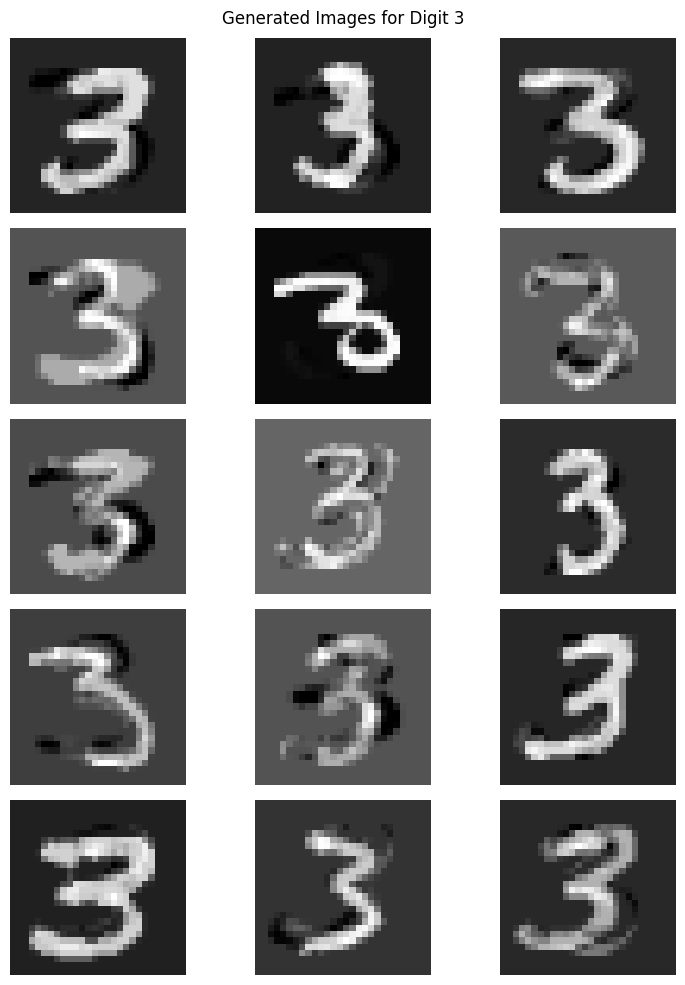

In [89]:
model.generate_images("Generated Images for Digit 3")

In [90]:
X_5_subsample = X_digit_5[0:50]
X_5_subsample.shape

(50, 784)

In [91]:
model2 = Smote(X_5_subsample)
model2.smote_implementation()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

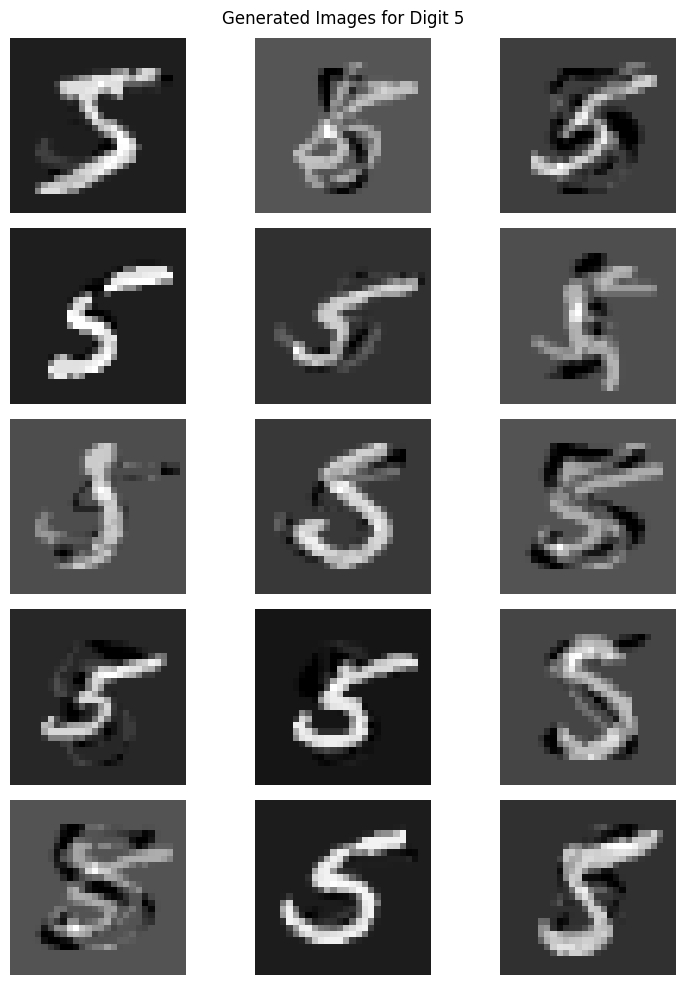

In [92]:
model2.generate_images("Generated Images for Digit 5")

In [98]:
X_5_newsample = X_digit_5[0:1000]
model3 = Smote(X_5_newsample)
model3.smote_implementation()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

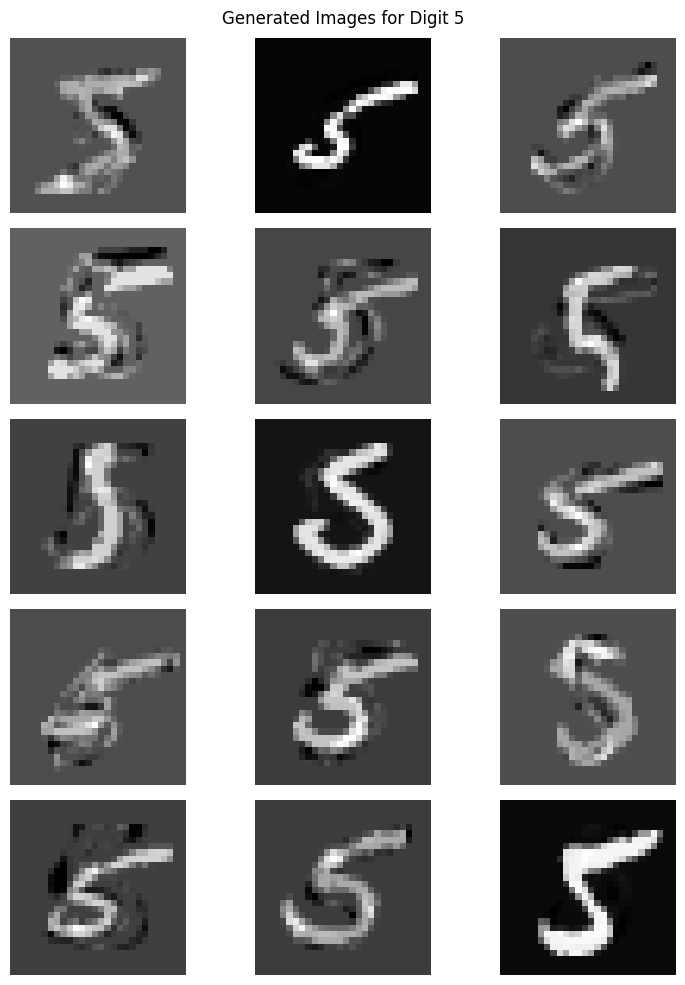

In [99]:
model3.generate_images("Generated Images for Digit 5")